# Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Check

In [40]:
df = pd.read_csv("ycombinator.csv")

df.head()

,company_name,link,short_description,tags,company_socials,founded,team_size,full_location,location,active_founders,about_founders,description
0,Airbnb,http://airbnb.com,Book accommodations around the world.,"['W09', 'Public', 'Marketplace', 'Travel']","['https://www.linkedin.com/company/airbnb/', '...",2008.0,5000.0,"San Francisco, CA, USA",San Francisco,"['Nathan Blecharczyk', 'Brian Chesky', 'Joe Ge...","[{'name': 'Joe Gebbia, CPO', 'role': 'CPO', 's...",Founded in August of 2008 and based in San Fra...
1,Coinbase,https://www.coinbase.com,"Buy, sell, and manage cryptocurrencies.","['S12', 'Public']","['https://twitter.com/coinbase', 'https://www....",2012.0,500.0,"San Francisco, CA, USA",San Francisco,['Brian Armstrong'],"[{'name': 'Brian Armstrong', 'role': 'CEO', 's...","Founded in June of 2012, Coinbase is a digital..."
2,DoorDash,http://doordash.com,Restaurant delivery.,"['S13', 'Public']","['https://www.linkedin.com/company/doordash/',...",NaN,1600.0,"San Francisco, CA, USA",San Francisco,['Tony Xu'],"[{'name': 'Andy Fang', 'role': 'Founder', 'soc...","Founded in 2013, DoorDash is a San Francisco-b..."
3,GitLab,http://gitlab.com/,A complete DevOps platform delivered as a sing...,"['W15', 'Public', 'DevSecOps', 'Developer Tools']",['https://www.linkedin.com/company/gitlab-com'...,2012.0,1200.0,"San Francisco, CA, USA",San Francisco,['Dmitriy Zaporozhets'],"[{'name': 'Sid Sijbrandij', 'role': 'CEO', 'so...",GitLab is the first single application for the...
4,Dropbox,http://dropbox.com,Backup and share files in the cloud.,"['S07', 'Public']","['https://www.linkedin.com/company/dropbox/', ...",2008.0,4000.0,"San Francisco, CA, USA",San Francisco,"['Arash Ferdowsi', 'Drew Houston']","[{'name': 'Drew Houston, CEO', 'role': 'CEO', ...",Dropbox is building the world’s first smart wo...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       1000 non-null   object 
 1   link               999 non-null    object 
 2   short_description  996 non-null    object 
 3   tags               1000 non-null   object 
 4   company_socials    1000 non-null   object 
 5   founded            826 non-null    float64
 6   team_size          987 non-null    float64
 7   full_location      984 non-null    object 
 8   location           989 non-null    object 
 9   active_founders    987 non-null    object 
 10  about_founders     1000 non-null   object 
 11  description        972 non-null    object 
dtypes: float64(2), object(10)
memory usage: 93.9+ KB


### unique record in each column
- it is expected to have 1000 unique company links
- for company name, it is possible for two company to share similar name

In [42]:
df.nunique()

company_name         997
link                 999
short_description    996
tags                 729
company_socials      940
founded               17
team_size            135
full_location        200
location             197
active_founders      984
about_founders       987
description          972
dtype: int64

### Why duplicates in company's name?
From the check below, it is obvious that the company share similar name but thier description and link and different, which means the records are different

In [43]:
df[df.duplicated(['company_name'], keep=False)].sort_values(by='company_name').head(10)

,company_name,link,short_description,tags,company_socials,founded,team_size,full_location,location,active_founders,about_founders,description
801,Atlas,https://www.getatlas.io/,All-in-one customer support platform built for...,"['W22', 'Active', 'SaaS', 'B2B']",['https://www.linkedin.com/company/atlas-suppo...,2021.0,5.0,"Dublin, CA 94568, USA","Dublin, CA","['Rahul Asati', ""Jon O'Bryan""]","[{'name': ""Jon O'Bryan"", 'role': '', 'social_m...",Atlas is an all-in-one customer support tool t...
962,Atlas,https://atlas.kitchen,"Operating system for restaurants, focusing on ...","['S21', 'Active']",[],2021.0,6.0,Singapore,Singapore,"['Shawn Liam', 'Ernest Sim', 'Yi Sung (Sung) Y...","[{'name': 'Yi Sung (Sung) Yong', 'role': '', '...",Atlas is building the operating system for res...
655,Nash,https://getnashglobal.com/,All in one finance platform for borderless bus...,"['W22', 'Active', 'Banking as a Service', 'Fin...",['https://www.linkedin.com/company/nashglobal'...,2021.0,11.0,"Nairobi, Kenya","Nairobi, Kenya","['Lione Alushula', 'George Mbuthia', 'Anthony ...","[{'name': 'Anthony Wagacha', 'role': '', 'soci...",Nash enables finance teams to manage all their...
921,Nash,https://www.usenash.com/,The easiest way for any business to offer deli...,"['S21', 'Active', 'B2B', 'Marketplace', 'Deliv...","['https://www.linkedin.com/company/usenash', '...",2021.0,15.0,"San Francisco, CA, USA",San Francisco,"['Aziz Alghunaim', 'Mahmoud Ghulman']","[{'name': 'Mahmoud Ghulman', 'role': '', 'soci...",Nash makes it easy for businesses to offer sam...
345,Streak,http://streak.com,Streak transforms Gmail into a customizable CR...,"['S11', 'Active', 'SaaS']","['https://twitter.com/Streak', 'https://www.fa...",2012.0,35.0,NaN,San Francisco,['Aleem Mawani'],"[{'name': 'Aleem Mawani', 'role': 'Founder', '...",Streak is the only CRM integrated entirely wit...
747,Streak,https://www.streakcard.com/,A neo-banking platform for children in India,"['W22', 'Active', 'Fintech']",['https://www.linkedin.com/company/streakcard'...,2020.0,7.0,"Bengaluru, Karnataka, India","Bengaluru, India","['Shiv Bidani', 'Balaji R', 'Mitul Mehta']","[{'name': 'Mitul Mehta', 'role': '', 'social_m...","At Streak, we are building a new age personali..."


### Why not 1000 links?
After a manual check on the website, the company couldn't be found.

In [44]:
df[df.link.isna()]

,company_name,link,short_description,tags,company_socials,founded,team_size,full_location,location,active_founders,about_founders,description
328,Tambo,NaN,We believe you can beat cancer without poisoni...,"['W15', 'Active', 'Therapeutics', 'Biotech']",['https://www.linkedin.com/company/shasqi-inc....,2015.0,10.0,"San Francisco, CA, USA",San Francisco,['Jose M. Mejia Oneto'],"[{'name': 'Jose M. Mejia Oneto, CEO', 'role': ...","Our technology, based on click chemistry, enab..."


In [45]:
df.count()

company_name         1000
link                  999
short_description     996
tags                 1000
company_socials      1000
founded               826
team_size             987
full_location         984
location              989
active_founders       987
about_founders       1000
description           972
dtype: int64

# Column Engineering

### Extract number of founders

In [46]:
from ast import literal_eval

df['active_founders'] = df.active_founders.fillna('[]')
df['no_founders'] = df['active_founders'].apply(lambda x: len(literal_eval(x)))
df.head()
    

,company_name,link,short_description,tags,company_socials,founded,team_size,full_location,location,active_founders,about_founders,description,no_founders
0,Airbnb,http://airbnb.com,Book accommodations around the world.,"['W09', 'Public', 'Marketplace', 'Travel']","['https://www.linkedin.com/company/airbnb/', '...",2008.0,5000.0,"San Francisco, CA, USA",San Francisco,"['Nathan Blecharczyk', 'Brian Chesky', 'Joe Ge...","[{'name': 'Joe Gebbia, CPO', 'role': 'CPO', 's...",Founded in August of 2008 and based in San Fra...,3
1,Coinbase,https://www.coinbase.com,"Buy, sell, and manage cryptocurrencies.","['S12', 'Public']","['https://twitter.com/coinbase', 'https://www....",2012.0,500.0,"San Francisco, CA, USA",San Francisco,['Brian Armstrong'],"[{'name': 'Brian Armstrong', 'role': 'CEO', 's...","Founded in June of 2012, Coinbase is a digital...",1
2,DoorDash,http://doordash.com,Restaurant delivery.,"['S13', 'Public']","['https://www.linkedin.com/company/doordash/',...",NaN,1600.0,"San Francisco, CA, USA",San Francisco,['Tony Xu'],"[{'name': 'Andy Fang', 'role': 'Founder', 'soc...","Founded in 2013, DoorDash is a San Francisco-b...",1
3,GitLab,http://gitlab.com/,A complete DevOps platform delivered as a sing...,"['W15', 'Public', 'DevSecOps', 'Developer Tools']",['https://www.linkedin.com/company/gitlab-com'...,2012.0,1200.0,"San Francisco, CA, USA",San Francisco,['Dmitriy Zaporozhets'],"[{'name': 'Sid Sijbrandij', 'role': 'CEO', 'so...",GitLab is the first single application for the...,1
4,Dropbox,http://dropbox.com,Backup and share files in the cloud.,"['S07', 'Public']","['https://www.linkedin.com/company/dropbox/', ...",2008.0,4000.0,"San Francisco, CA, USA",San Francisco,"['Arash Ferdowsi', 'Drew Houston']","[{'name': 'Drew Houston, CEO', 'role': 'CEO', ...",Dropbox is building the world’s first smart wo...,2


### Extract country

In [47]:
df['full_location'] = df.full_location.fillna('na')
df['country'] = df.full_location.apply(lambda x: x.split(',')[-1].strip())
df.head(2)


,company_name,link,short_description,tags,company_socials,founded,team_size,full_location,location,active_founders,about_founders,description,no_founders,country
0,Airbnb,http://airbnb.com,Book accommodations around the world.,"['W09', 'Public', 'Marketplace', 'Travel']","['https://www.linkedin.com/company/airbnb/', '...",2008.0,5000.0,"San Francisco, CA, USA",San Francisco,"['Nathan Blecharczyk', 'Brian Chesky', 'Joe Ge...","[{'name': 'Joe Gebbia, CPO', 'role': 'CPO', 's...",Founded in August of 2008 and based in San Fra...,3,USA
1,Coinbase,https://www.coinbase.com,"Buy, sell, and manage cryptocurrencies.","['S12', 'Public']","['https://twitter.com/coinbase', 'https://www....",2012.0,500.0,"San Francisco, CA, USA",San Francisco,['Brian Armstrong'],"[{'name': 'Brian Armstrong', 'role': 'CEO', 's...","Founded in June of 2012, Coinbase is a digital...",1,USA


In [50]:
df["country"].value_counts().sort_index()

Abu Dhabi - United Arab Emirates      1
Algeria                               1
Argentina                             5
Australia                             5
Austria                               1
Bangladesh                            1
Brazil                               12
Canada                               36
Chile                                 6
China                                 1
Colombia                             10
Costa Rica                            1
Denmark                               4
Dubai - United Arab Emirates          4
Egypt                                 2
Estonia                               2
Ethiopia                              1
Finland                               2
France                                8
Georgia                               1
Germany                               8
Ghana                                 1
Hong Kong                             4
Hungary                               1
India                                48


### Fix country names

In [52]:
mapper = {"nan": np.NaN, "Dubai - United Arab Emirates" :"UAE", "Abu Dhabi - United Arab Emirates":"UAE"}
df["country"].replace(mapper, inplace=True)
df["country"].value_counts().sort_index()

Algeria          1
Argentina        5
Australia        5
Austria          1
Bangladesh       1
Brazil          12
Canada          36
Chile            6
China            1
Colombia        10
Costa Rica       1
Denmark          4
Egypt            2
Estonia          2
Ethiopia         1
Finland          2
France           8
Georgia          1
Germany          8
Ghana            1
Hong Kong        4
Hungary          1
India           48
Indonesia       22
Ireland          1
Israel           4
Kenya            2
Latvia           1
Malaysia         3
Mexico          16
Namibia          1
Nepal            1
Netherlands      5
New Zealand      1
Nigeria         25
Norway           2
Pakistan         5
Panama           2
Peru             1
Poland           1
Senegal          2
Singapore       16
South Korea      3
Spain            6
Sudan            1
Sweden           4
Switzerland      3
Taiwan           1
Turkey           1
UAE              5
UK              28
USA            653
Uganda      

# Analysis of the data

Text(0.5, 1.0, 'Start-up by conutry')

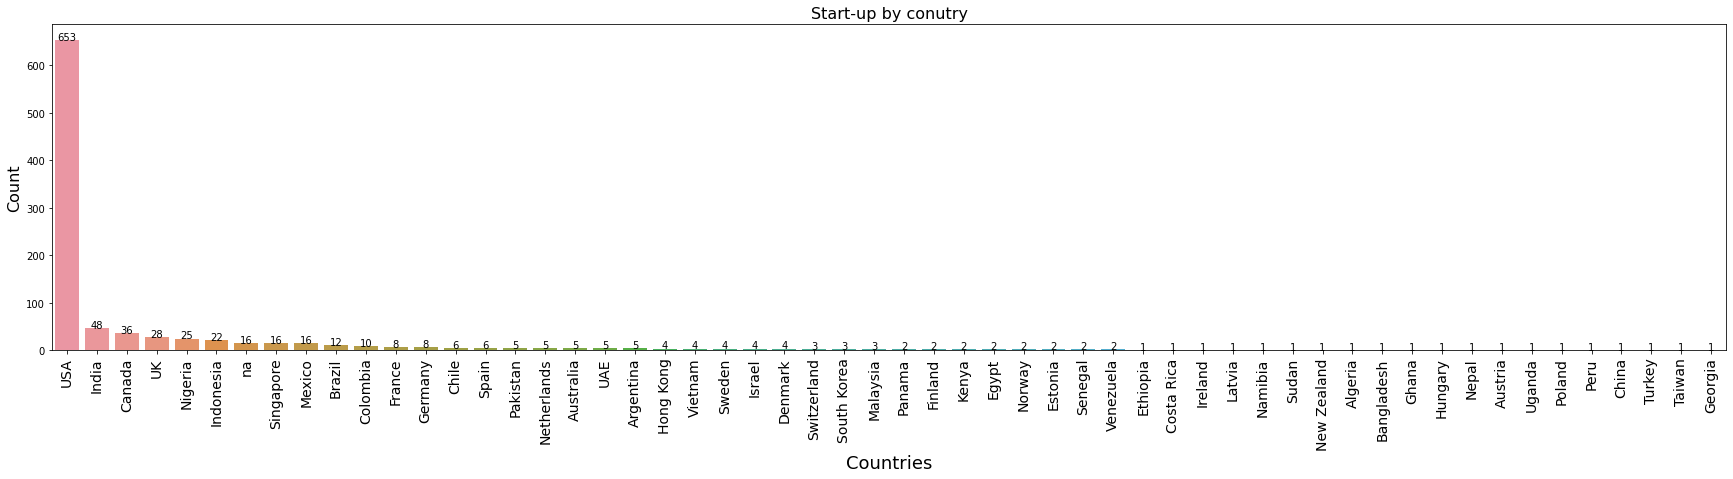

In [103]:

# set the plot size
plt.figure(figsize = (30,6))

ax = sns.barplot(x = df['country'].value_counts().index, 
                 y =df['country'].value_counts().values,
                 data = df);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14)
plt.xlabel("Countries",fontsize = 18)
plt.ylabel("Count",fontsize = 16)

for i, row in enumerate(df['country'].value_counts().values):
    ax.text(i, row, round(row, 2), color='black', ha="center")

plt.title("Start-up by conutry",fontsize = 16)

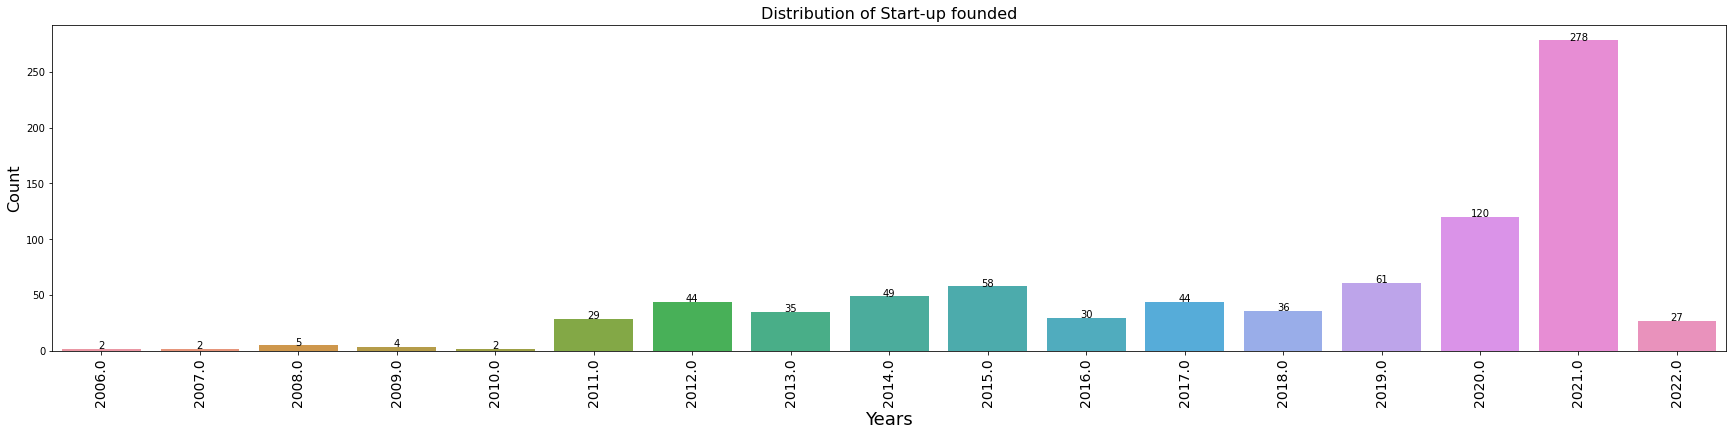

In [101]:

plt.figure(figsize = (30,6))

ax = sns.countplot(x=df['founded'])

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Years",fontsize = 18)
plt.ylabel("Count",fontsize = 16)
# title the graph
for i, row in enumerate(df['founded'].value_counts().sort_index().values):
    ax.text(i, row, round(row, 2), color='black', ha="center")
plt.title("Distribution of Start-up founded",fontsize = 16);

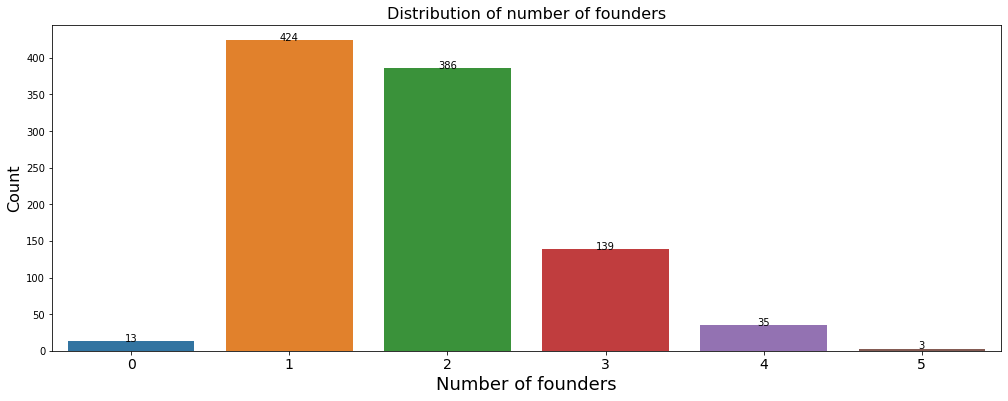

In [80]:
ax = sns.countplot(x=df['no_founders']);

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14);

plt.xlabel("Number of founders",fontsize = 18);
plt.ylabel("Count",fontsize = 16);

for i, row in enumerate(df['no_founders'].value_counts().sort_index().values):
    ax.text(i, row, round(row, 2), color='black', ha="center")
plt.title("Distribution of number of founders",fontsize = 16);

Text(0.5, 1.0, 'Team size per company')

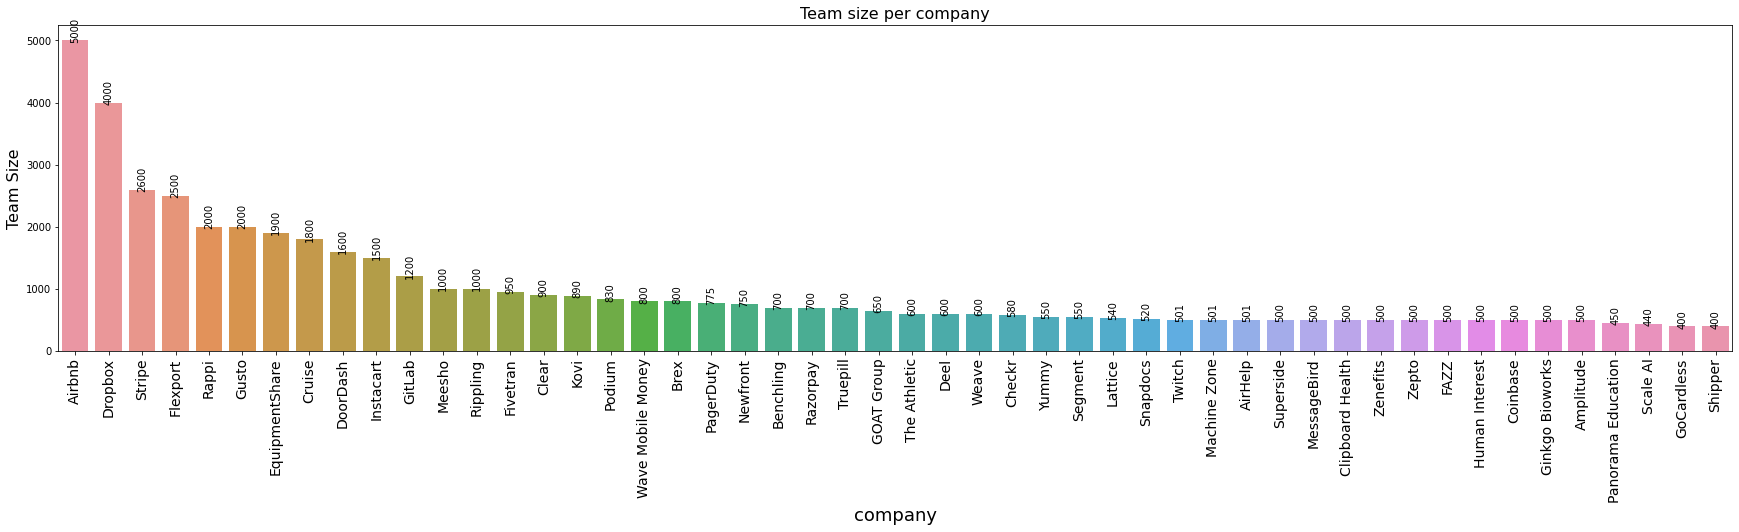

In [99]:
# set the plot size
plt.figure(figsize = (30,6))

a = df.sort_values(by='team_size', ascending=False).head(50)
ax = sns.barplot(x = a['company_name'], 
                 y =a['team_size'],
                 data = a);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14)
plt.xlabel("company",fontsize = 18)
plt.ylabel("Team Size",fontsize = 16)

for i, row in enumerate(a['team_size']):
    ax.text(i, row, round(row), color='black', ha="center", rotation=90)

plt.title("Team size per company",fontsize = 16)



### `Total Empowered `

In [98]:
print(f"Total empowered by Y-Combinator: {df['team_size'].sum()}")

Total empowered by Y-Combinator: 90373.0
